<a href="https://colab.research.google.com/github/tanujpokhriyal2005/Machine-Learning/blob/main/BinningDiscretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv("train.csv",usecols = ['Age','Fare','Survived'])

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(714, 3)

In [ ]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
x_train.head(2)

Age     Fare
328  31.0  20.5250
73   26.0  14.4542

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6345266040688575)

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=15,encode = 'ordinal',strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode = 'ordinal',strategy = 'quantile')

In [ ]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [ ]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [ ]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [ ]:
output = pd.DataFrame({
    'age': x_train['Age'],
    'age_trf': x_train_trf[:,0],
    'fare': x_train['Fare'],
    'fare_trf': x_train_trf[:,1]
})


In [ ]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                              bins= trf.named_transformers_['first']
                              .bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                              bins= trf.named_transformers_['second']
                              .bin_edges_[0].tolist())



In [ ]:
output.sample(5)

age  age_trf     fare  fare_trf    age_labels     fare_labels
285  33.0      9.0   8.6625       4.0  (32.0, 35.0]   (8.158, 10.5]
811  39.0     11.0  24.1500       8.0  (38.0, 42.0]   (18.75, 26.0]
567  29.0      7.0  21.0750       8.0  (28.0, 30.0]   (18.75, 26.0]
619  26.0      6.0  10.5000       5.0  (25.0, 28.0]   (8.158, 10.5]
152  55.5     14.0   8.0500       3.0  (54.0, 80.0]  (7.896, 8.158]

in age_trf and fare_trf we can see that we made them discreate and they fall in the region of age_label and fare_label

In [ ]:
# now after transformation and binning lets see what prediction is
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)
accuracy_score(y_test,y_pred2)


0.6363636363636364

In [ ]:
# lets see cross val score
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv = 10,scoring='accuracy'))

np.float64(0.6289123630672926)

In [ ]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6331181533646322


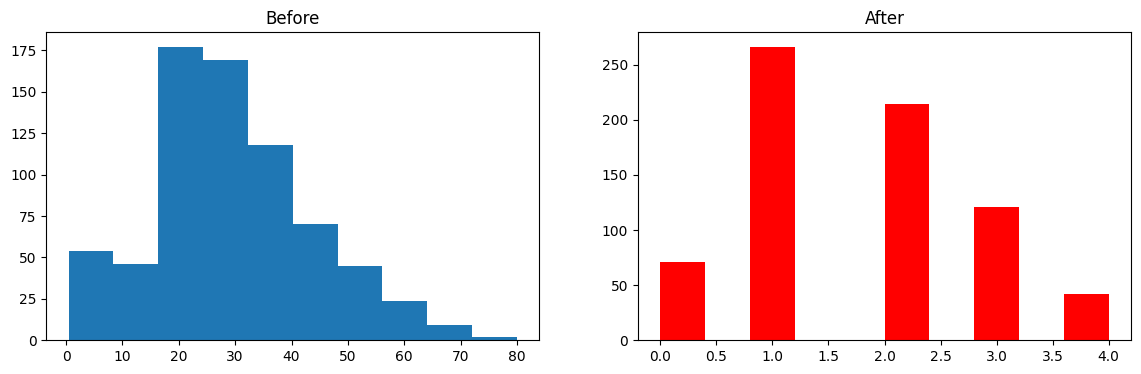

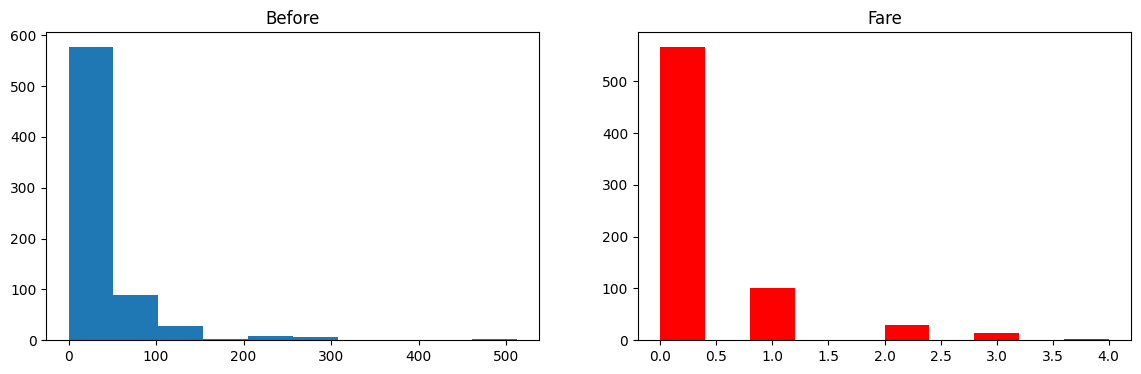

In [ ]:
discretize(5,'kmeans')


little bit normalized